In [14]:
import numpy as np
import pandas as pd
df=pd.read_csv('nirf.csv')

In [15]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2233,ham,Good Morning plz call me sir,NaN,NaN,NaN
4417,ham,"When you get free, call me",NaN,NaN,NaN
2936,ham,Lol yep did that yesterday. Already got my fir...,NaN,NaN,NaN
1012,ham,I dunno they close oredi not... �� v ma fan...,NaN,NaN,NaN
4620,ham,"Received, understood n acted upon!",NaN,NaN,NaN


In [16]:
df.shape

(5572, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [19]:
df.sample(5)

,v1,v2
2528,ham,jay says he'll put in &lt;#&gt;
4973,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...
5286,ham,I'm still pretty weak today .. Bad day ?
2926,ham,Ok... U enjoy ur shows...
1305,ham,Designation is software developer and may be s...


In [20]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [21]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})


In [22]:
print(df.columns)
df.head()   

Index(['v1', 'v2'], dtype='object')


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.rename(columns={'v1':'Found ','v2':'Text'})

,Found,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [24]:
df.duplicated().sum()

np.int64(403)

In [25]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [26]:
df.shape

(5169, 2)

EDA

In [27]:
df.head(5)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.rename(columns={'v1':'Found ','v2':'Text'},inplace=True)

In [29]:
print(df.columns)

Index(['Found ', 'Text'], dtype='object')


In [30]:
df['Found '].value_counts()

Found 
0    4516
1     653
Name: count, dtype: int64

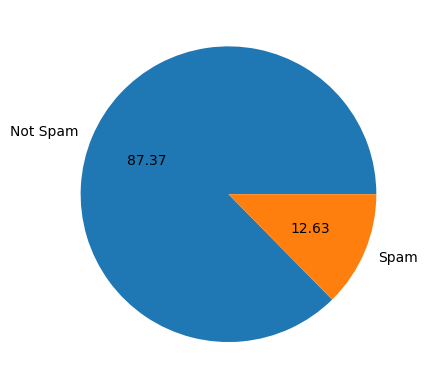

In [31]:
import matplotlib.pyplot as plt
plt.pie(df['Found '].value_counts(),labels=['Not Spam','Spam'],autopct='%0.2f')
plt.show()

In [32]:
import nltk
df['num_char']=df['Text'].apply(len)

In [33]:
df.head(4)

,Found,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [34]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SHURVEER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
 # num of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:

df.head() 

,Found,Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will �_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [38]:
df['sent_num']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [39]:
df.head(4)

,Found,Text,num_char,num_words,sent_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [40]:
df[['num_char','num_words','sent_num']].describe()

,num_char,num_words,sent_num
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#Not spam
df[df['Found ']==0][['num_char','num_words','sent_num']].describe()

,num_char,num_words,sent_num
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
df[df['Found ']==1][['num_char','num_words','sent_num']].describe()

,num_char,num_words,sent_num
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [43]:
import seaborn as sns

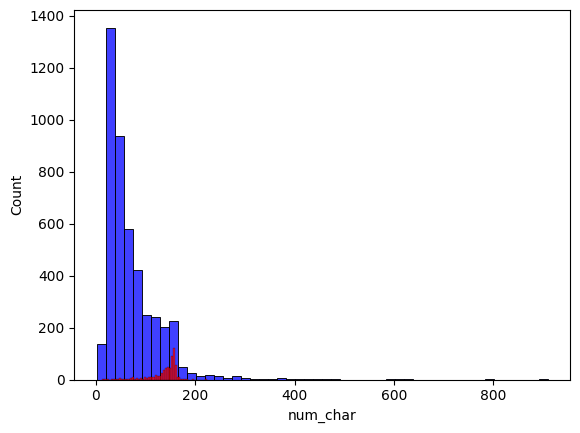

In [44]:
sns.histplot(df[df['Found ']==0]['num_char'],bins=50,color='blue')
sns.histplot(df[df['Found ']==1]['num_char'],bins=50,color='red')
plt.show()

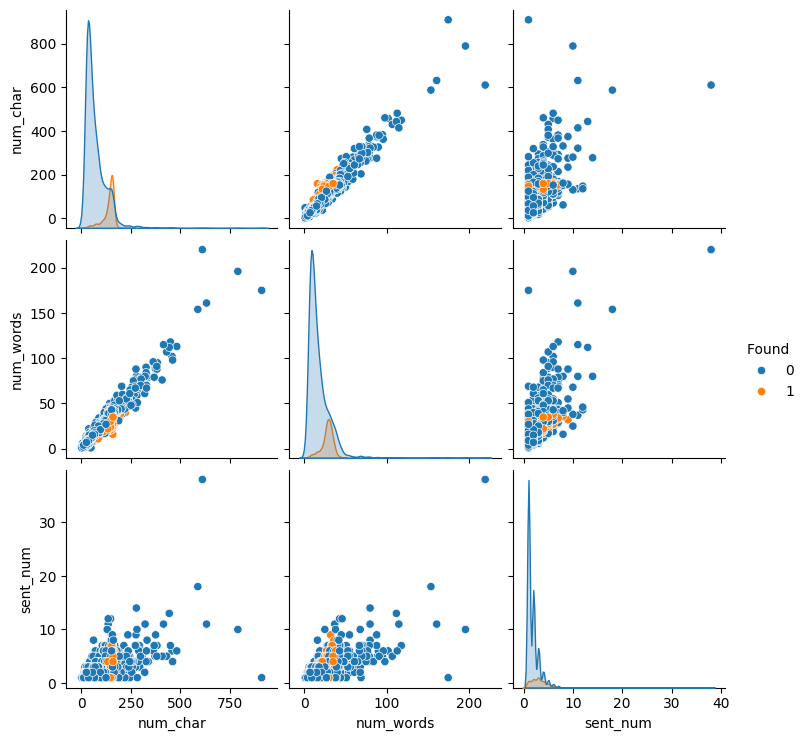

In [45]:
sns.pairplot(df,hue='Found ')
plt.show()

In [46]:
"""sns.heatmap(df.corr(),annot=True"""

'sns.heatmap(df.corr(),annot=True'

<Axes: >

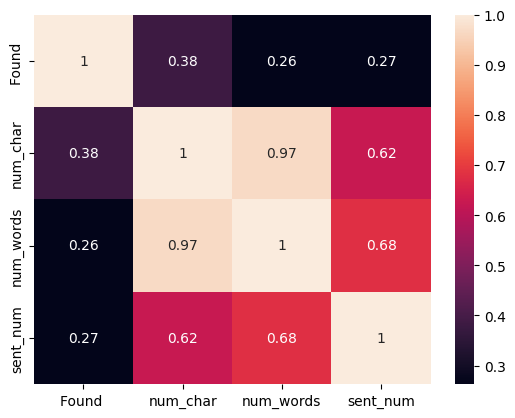

In [47]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True)


3. Data Preprocessing
. Lower case
· Tokenization
. Removing special characters
. Removing stop words and punctuation
· Stemming


In [48]:
df['Text_lower'] = df['Text'].str.lower()


In [49]:
df.head(4)

,Found,Text,num_char,num_words,sent_num,Text_lower
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...


In [50]:
import nltk

df['Text_tokens'] = df['Text_lower'].apply(
    lambda x: nltk.word_tokenize(x)
)


In [51]:
df[['Text_lower', 'Text_tokens']].head()


,Text_lower,Text_tokens
0,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [52]:
import re

df['Text_clean_tokens'] = df['Text_tokens'].apply(
    lambda tokens: [re.sub(r'[^a-zA-Z0-9]', '', word) for word in tokens]
)


In [53]:
df[['Text_tokens', 'Text_clean_tokens']].head()


,Text_tokens,Text_clean_tokens
0,"[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, , crazy, , availabl..."
1,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, , joking, wif, u, oni, ]"
2,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,"[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, so, early, hor, , u, c, already,..."
4,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, nt, think, he, goes, to, usf, , h..."


In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string


In [55]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHURVEER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
def preprocess_text(text):
    
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Tokenization
    tokens = nltk.word_tokenize(text)
    
    # 3. Remove special characters (keep only alphanumeric)
    y = []
    for word in tokens:
        if word.isalnum():
            y.append(word)
    
    # 4. Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = []
    for word in y:
        if word not in stop_words and word not in string.punctuation:
            tokens.append(word)
    
    # 5. Stemming
    ps = PorterStemmer()
    final_tokens = []
    for word in tokens:
        final_tokens.append(ps.stem(word))
    
    return final_tokens


In [57]:
preprocess_text("Hello friends, how are you doing today?")

['hello', 'friend', 'today']

In [58]:
df['transformed_text']=df['Text'].apply(preprocess_text)

In [59]:
df.head()

,Found,Text,num_char,num_words,sent_num,Text_lower,Text_tokens,Text_clean_tokens,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, , crazy, , availabl...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, , joking, wif, u, oni, ]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, so, early, hor, , u, c, already,...","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, nt, think, he, goes, to, usf, , h...","[nah, think, goe, usf, live, around, though]"


In [60]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [61]:
df['transformed_text'] = df['transformed_text'].apply(
    lambda x: " ".join(x)
)


In [62]:
df.head()

,Found,Text,num_char,num_words,sent_num,Text_lower,Text_tokens,Text_clean_tokens,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, , crazy, , availabl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, , joking, wif, u, oni, ]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, so, early, hor, , u, c, already,...",u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, nt, think, he, goes, to, usf, , h...",nah think goe usf live around though


In [63]:
spam_wc = wc.generate(
    df[df['Found '] == 1]['transformed_text'].str.cat(sep=" ")
)


(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

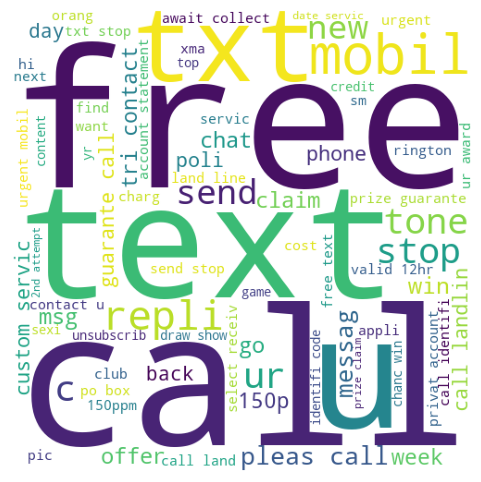

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.axis('off')


In [65]:
nonspam_wc = wc.generate(
    df[df['Found '] ==0]['transformed_text'].str.cat(sep=" ")
)


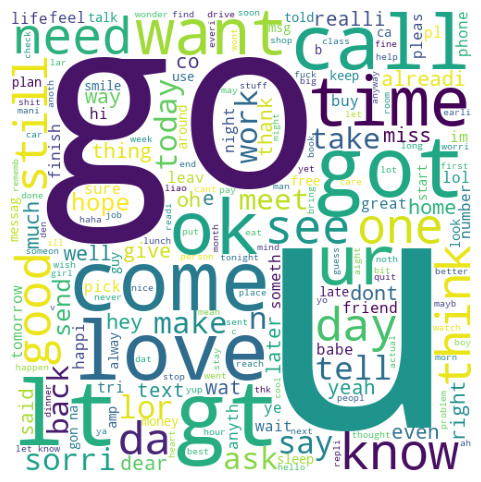

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(nonspam_wc)
plt.axis('off')
plt.show()

In [67]:
spam_words = []

for tokens in df[df['Found '] == 1]['transformed_text'].tolist():
    for word in tokens.split():
        spam_words.append(word)


In [68]:
len(spam_words)

9941

In [69]:
from collections import Counter

top_30_df = pd.DataFrame(
    Counter(spam_words).most_common(30),
    columns=['Word', 'Frequency']
)


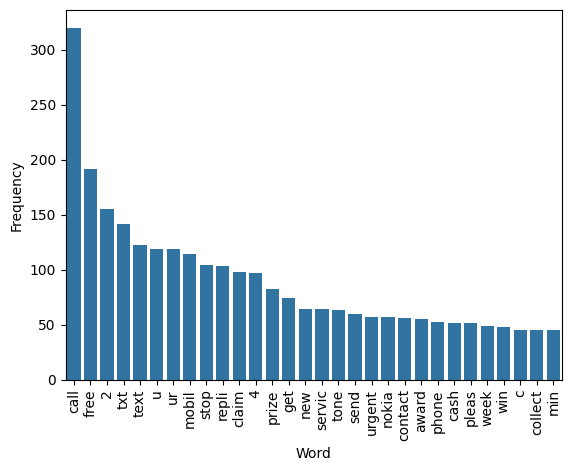

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x='Word',
    y='Frequency',
    data=top_30_df
)

plt.xticks(rotation='vertical')
plt.show()


In [71]:
nonspam_words = []

for tokens in df[df['Found '] == 0]['transformed_text'].tolist():
    for word in tokens.split():
        nonspam_words.append(word)

len(nonspam_words)

35305

In [72]:
from collections import Counter

ntop_30_df = pd.DataFrame(
    Counter(nonspam_words).most_common(30),
    columns=['Word', 'Frequency']
)


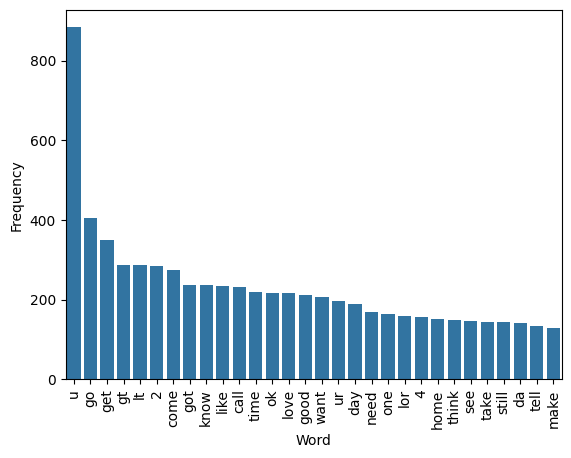

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x='Word',
    y='Frequency',
    data=ntop_30_df
)

plt.xticks(rotation='vertical')
plt.show()


MOdel Building

In [74]:
"""X = df['transformed_text']   # input feature (text)
y = df['Found ']             # target (0 = ham, 1 = spam)
"""

"X = df['transformed_text']   # input feature (text)\ny = df['Found ']             # target (0 = ham, 1 = spam)\n"

In [75]:
"""from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)"""
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()


In [76]:
X=cv.fit_transform(df['transformed_text']).toarray()


In [77]:
"""X_train_cv = cv.fit_transform(X_train)
X_test_cv  = cv.transform(X_test)
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()    
nb.fit(X_train_cv, y_train)
y_pred = nb.predict(X_test_cv)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)  """


'X_train_cv = cv.fit_transform(X_train)\nX_test_cv  = cv.transform(X_test)\nfrom sklearn.naive_bayes import MultinomialNB\n\nnb = MultinomialNB()    \nnb.fit(X_train_cv, y_train)\ny_pred = nb.predict(X_test_cv)\n\nfrom sklearn.metrics import accuracy_score\naccuracy_score(y_test, y_pred)  '

In [78]:
X.shape


(5169, 6677)

In [79]:
Y =df['Found '].values

In [80]:
Y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,Y , test_size=0.2,random_state=2)

In [83]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix , precision_score

In [84]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [85]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [86]:
mnb.fit(X_train,y_train)
y_pred2=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [87]:
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [88]:
X = df['transformed_text']
y = df['Found ']   # 0 = ham, 1 = spam


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)


In [91]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


In [92]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [93]:
y_pred = model.predict(X_test_tfidf)


In [94]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9680851063829787


In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[888   1]
 [ 32 113]]


In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.78      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [99]:
sample_sms = "Congratulations! You have won a free lottery ticket. Call now"
sample_sms_tfidf = tfidf.transform([sample_sms])
prediction = model.predict(sample_sms_tfidf)
# Output: [1] for spam, [0] for ham
if prediction[0] == 1:
    print("🚨 SPAM MESSAGE")
else:
    print("✅ HAM MESSAGE")



✅ HAM MESSAGE


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [100]:
import os
print(os.getcwd())


c:\Users\SHURVEER\.vscode\Model\SMS-SPAM-CLASSIFIER


In [101]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))
